# Causal Discovery / Validation
---

In [ ]:
# imports
import numpy as np
import pandas as pd
import dowhy
import matplotlib.pyplot as plt
import networkx as nx
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ScoreBased.GES import ges

from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import io

df = pd.read_csv('renewal_data.csv')

Ground Truth:

In [ ]:
ground_truth = [('is_senior', 'interactions'),
         ('sale_calls', 'interactions'),
         ('interactions', 'renewal'),
         ('bugs_faced', 'renewal'),
         ('bugs_faced', 'discount'),
         ('monthly_usage', 'renewal'),
         ('monthly_usage', 'discount'),
         ('consumer_trust', 'renewal'),
         ('discount', 'renewal')]

G = nx.DiGraph()
nodes = ["is_senior", "sale_calls", "bugs_faced", "monthly_usage", "consumer_trust", "interactions", "discount", "renewal"]
G.add_nodes_from(nodes)
G.add_edges_from(ground_truth)
nx.draw_networkx(G, arrows = True, node_shape = "s", node_color = "white")
plt.title("Groun Truth DAG")
plt.show()

Causal Discovery:

Depth=4, working on node 7: 100%|██████████| 8/8 [00:00<?, ?it/s]          


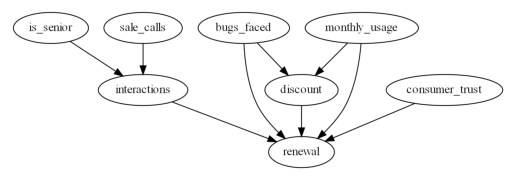

In [3]:
## PC algorithm

labels = [f'{col}' for i, col in enumerate(df.columns)]
data = df.to_numpy()

cg = pc(data)

# Visualization using pydot
pyd = GraphUtils.to_pydot(cg.G, labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

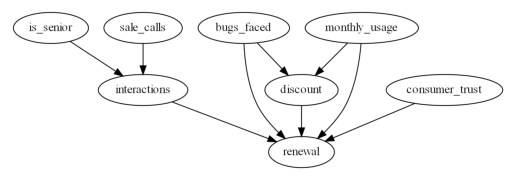

In [4]:
# GES Algorithm

# default parameters
Record = ges(data)

# Visualization using pydot
pyd = GraphUtils.to_pydot(Record['G'], labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

Causal Validation (Via Falsification):  
https://www.pywhy.org/dowhy/v0.11.1/example_notebooks/gcm_falsify_dag.html

In [5]:
# w/ do-why

